#### Interpolación

Dados $n+1$ puntos distintos $x _{0}, x _{ 1} , ..., x _{ n}  $ y conocidos los valores $f(x _{0}), f(x _{ 1} ), ..., f(x _{n} ) $, se busca un polinomio $P(x)$ de grado $\leq n$ tal que: 

$$f(x _{0}) = P(x _{0} ), \quad f(x _{1}) = P(x _{1} ), \quad \dots , \quad f(x _{n}) = P(x _{n} )  $$

#### Interpolación de Lagrange

Construcción de polinomio de grado $n$ que pasa por $n+1$ puntos distintos $x _{0}, x _{ 1} , ..., x _{ n}  $.

Sea $$A(x) = (x-x _{0})(x- x _{ 1} ) \cdots (x - x _{ n} ) =\displaystyle \prod _{j=0} ^{ n} (x-x _{ j} )  $$

$A(x)$ tiene un cero simple en cada $x _{j} $.

Sea $$A _{k}(x) = \displaystyle \prod _{j=0,\ \  j\neq k}  ^{ n}  (x - x _{ j} )  $$ 

Note que $x _{k} $ no es un cero de $A _{k } (x)$. También note que $\displaystyle \frac{A _{k } (x) }{A _{k } (x _{k} )} $ es un polinomio que asume el valor $1$ cuando $x = x _{k } $ y que asume el valor $0$ cuando $x = x _{ j}$ con $x _{ j} \neq x _{k } $     

Es así como $$\displaystyle P(x) = \displaystyle \sum _{k=0} ^{ n} \frac{f(x _{k } ) A _{k } (x)}{A _{k } (x _{k } )}  $$
es un polinomio de grado $\leq n$ tal que $f(x _{ j} ) = P(x _{ j} ), \quad \forall j=0, 1, \dots , n$ 

Otra forma de escribir a $P(x)$ es $$\displaystyle \sum _{k=0} ^{ n} \left [ f(x _{k } ) \prod _{j=0, \ \ j\neq k}  ^{ n} 
\frac{x - x _{ j} }{x _{k } - x _{ j} } \right ]  $$ 







In [10]:
import sympy as sy

def cardinal(X, k):
    """
    ENTRADAS: X lista de floats distintos. k: entero
    SALIDA: Expresión simbólica de sympy. Polinomio cardinal.
    """
    x = sy.symbols('x')
    n = len(X) - 1
    numeradores = [x - X[j] for j in range(n+1) if j != k]
    denominadores = [X[k] - X[j] for j in range(n+1) if j != k]
    return sy.prod(numeradores) / sy.prod(denominadores)

def interpolaLagrange(X, Y):
    """
    ENTRADAS: X, Y son las listas [x0, x1, ..., xn] y [y0, y1, ..., yn]     
    SALIDA: Expresión simbólica de sympy. Polinomio de interpolación
    """
    n = len(X) - 1
    x = sy.symbols('x')
    cardinales = [cardinal(X, k) for k in range(n+1)]
    productos = [yk * card for yk, card in zip(Y, cardinales)]
    return sum(productos)

def interpolaLagrangeFunc(X, Y):
    """
    ENTRADAS: X, Y son las listas [x0, x1, ..., xn] y [y0, y1, ..., yn]     
    SALIDA: Función de Python. Polinomio de interpolación
    """
    n = len(X) - 1
    x = sy.symbols('x')
    return sy.lambdify(x, interpolaLagrange(X, Y), "numpy")



In [11]:
X = [-1,0, 1, 2]
Y = [4, -6, 7, 1]
x = sy.symbols('x')
interpolaLagrange(X, Y).expand()

-7*x**3 + 23*x**2/2 + 17*x/2 - 6

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def grafica_polinomio(P, xmin, xmax, **kwargs):
    dom = np.linspace(xmin, xmax)
    ax = plt.gca()
    ax.plot(dom, P(dom), **kwargs)

def grafica_puntos(x_s, y_s, **kwargs):
    ax = plt.gca()
    ax.scatter(x_s, y_s, **kwargs)

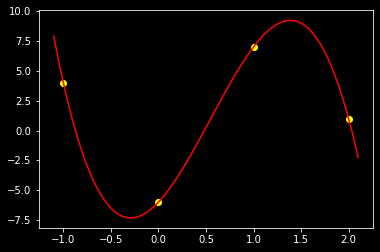

In [13]:
# Creación de gráficos de polinomio de interpolación y de puntos
#  de interlolación en un mismo sistema de ejes
fig, ax = plt.subplots()
P = interpolaLagrangeFunc(X, Y)
xmin, xmax = -1.1, 2.1
grafica_polinomio(P, xmin, xmax, color='red')
grafica_puntos(X, Y, c='yellow')
plt.show()

**Taller: Interpolación de Lagrange**

 En cada caso encuentre el polinomio $P$ de menor grado posible que satisface las condiciones:
  
a) $\ P(-1)=0$, $P(0)=2$, $P(2) = 7$.

b) $\ P(1)=1$, $P(2)=0$, $P(3) =0$, $P(4) =1$.

c) $\ P(1)=1$, $P(2)=2$, $P(3) =3$, $P(0) =1$.

d) $\ P(0)=-2$, $P(1)=0$, $P(-1) =-2$, $P(2) =16$.

e) $\ P(-2)=11$, $P(-1)=-11$, $P(0) =-5$, $P(1) =-1$.
  

 Sea $f(x) = \cos(\pi x/4)$. Encuentre el polinomio $P$ de menor grado posible que toma los mismos valores que $f$ en los puntos $-2, -4/3, 0, 4/3, 2$. Luego grafique sobre un mismo sistema de ejes a $f$ y a $P$.

 Sea $f(x) = \sin(\pi x/4)$. Encuentre el polinomio $P$ de menor grado posible que toma los mismos valores que $f$ en los puntos $-2, -4/3, 0, 4/3, 2$. Luego grafique sobre un mismo sistema de ejes a $f$ y a $P$.

 Sea $f(x) = \log _{4}(x) $.  Encuentre el polinomio $P$ de menor grado posible que toma los mismos valores que $f$ en los puntos:

a)    $x=1, 64$.

b)    $x=1, 16, 256$.

c)    $x=4, 16, 64$.

d)    $x=1, 4, 16, 64, 256$.


En cada caso calcule la diferencia $f(32)-P(32)$. ¿Se puede concluir que con la interpolación en general mejora la aproximación al aumentar el número de puntos de interpolación?



#### Interpolación de Chebyshev

Un problema natural que surge en la teoría de aproximación por polinomios interpolando es el de acotar el error de aproximación, es decir 
$$f(x) -P(x) = \displaystyle \frac{A(x)}{(n+1)!} f^{(n+1)}(c), \quad \text{con} \quad A(x) = (x-x _{0} )(x - x _{ 1} ) \cdots (x - x _{ n} )  $$

Allí $P$ es el polinomio de grado $\leq n$ que coincide con $f$ en los $n+1$ puntos distintos $x _{0}, x _{ 1} , \dots , x _{ n} \in [a,b] $. Asumiendo que $f$ posee derivada de orden $n+1$ sobre $[a,b]$, existe un tal $c$ en $[a, b]$. Para acotar el error se requieren cotas para la derivada $f ^{(n+1)} $ y para el producto $A(x)$. Dado que $A$ es un polinomio (continua en $[a,b]$), asume máximo en $[a,b]$ y dicho máximo tiene dependencia de la selección de puntos $x _{0}, x _{1},\dots x _{ n}    $, luego se busca seleccionar los puntos de tal forma que minimicen el máximo de $A$ sobre $[a,b]$. Este problema ha sido resuelto por Chebyshev.   



**Polinomios de Chebyshev**

Sea $x+iy$ un complejo de módulo $1$. Por teorema de binomio se tiene:
$$(x+iy) ^{ n} = \displaystyle \sum _{k=0} ^{ n} {n \choose k} x ^{n-k}(iy) ^{ k}, \quad \quad (1)   $$  

Por otro lado si tomamos $x = \cos \theta, \ y = \sin \theta$ y usamos la fórmula de Moivre, tenemos:
$$(x+iy) ^{ n} = (\cos \theta + i \ \sin \theta) ^{ n} = \cos n \theta + i\ \sin n \theta, \quad \quad (2)$$ 

La parte real en $(1)$ es la suma sobre los pares en $(2)$, luego
$$\cos \ n \theta = x ^{ n} - {n \choose 2} x ^{n-2} y ^{ 2} + {n \choose 4} x ^{n-4}y ^{4} - \cdots + \cdots, \quad \quad (3)   $$ 

Dado que $y ^{ 2} = \sin ^{ 2} \theta = 1 - \cos ^{ 2} \theta = 1 - x ^{ 2} $, al sustituir en lado derecho de $(3)$, obtenemos la forma del llamado polinomio de Chebyshev $T _{ n} (x)$:
$$T _{ n} (x) = \displaystyle \sum _{k=0} ^{[n/2]} {n\choose 2k} x ^{n-2k}(x ^{ 2} -1) ^{k}    $$  

Si $-1\leq x \leq 1$, la consideración $x = \cos \theta$ que equivale a $\theta = \arccos x$, puede ser reemplazada en $(2)$ y concluirse que $T _{ n} (x) = \cos (n \ \arccos x)$. Además, se consigue la siguiente fórmula de recursión:
$$T _{n+1}(x) = 2xT _{ n} (x) - T _{n-1}(x), \quad \text{para} \quad n\geq 1, \quad \text{con} \quad T _{0}(x) = 1 \quad \text{y} \quad T _{ 1} (x) = x   $$   
Y ello se debe a que bajo el supuesto $x = \cos \theta$,  la identidad trigonométrica 
$$\cos \ (n+1)\theta + \cos \ (n-1)\theta = 2\ \cos \theta \cos n\theta$$  
equivale a
$$T _{n+1}(x) + T _{n-1} (x) = 2x T _{n}(x), \quad \quad \text{para} \quad -1\leq x\leq 1   $$

Los siguientes son algunos ejemplos de polinomios de Chebyshev:

$T _{ 2} (x) = 2 x ^{ 2} -1, \quad T _{3}(x) = 4x ^{3} - 3x, \quad 
T _{4}(x) = 8 x ^{4} - 8 x ^{ 2} + 1, \quad T _{5}(x) = 16x ^{5} - 20 x ^{3} + 5x $ 

Se nota que los coeficientes son enteros. Además el término principal es $2 ^{n-1} $. 

**Teorema**

Si $n\geq 1$, el polinomio $T _{n}(x) $ tiene ceros en los puntos $x _{k} = \cos \frac{(2k+1)\pi}{2n}  , \quad k=0,1,2,\dots, n-1$   

Por lo tanto $T _{ n} (x) $ tiene la factorización 
$$T _{n}(x) = 2 ^{n-1}(x-x _{0} )(x-x _{ 1} )\cdots (x - x _{n-1} ) = 2 ^{n-1} \displaystyle 
\prod _{k=0} ^{n-1} \left ( x- \cos \frac{(2k+1)\pi}{2n}  \right )     $$ 

Si se usa la fórmula $T _{ n} (x) = \cos \ n\theta$, se notará que $\cos n\theta = 0$ solo si $n\theta$ es un múltiplo impar de $\pi/2$, así que  $T _{n}(x) = 0 $ para $x\in [-1,1]$ solo si $n \arccos x = (2k+1)\frac{\pi}{2} $ para algún entero $k$. Por lo tanto, los ceros de $T _{n} $ en el intervalo $[-1,1]$ son los números $$x _{k} = \displaystyle \cos \frac{2k+1}{n} \frac{\pi}{2}, \quad \quad k = 0, \pm 1, \pm 2, \dots    $$   

Cuando se toma $k=0,1,2, \dots, n-1$, se tienen $n$ puntos distintos $x _{0}, x _{ 1} , \dots , x _{ n-1} \in (-1,1) $. Dado que $T _{n} $ no puede tener más de $n $ ceros, entonces $x _{0}, x _{ 1} , \dots , x _{ n-1} $ son todos los ceros de $T _{n} $. 

**Teorema**

En el intervalo $[-1,1]$, los valores extremos de $T _{ n} (x)$ son $+1$ y $-1$, que se asumen de forma alternada en los $n+1$ puntos 
$$t _{k} = \displaystyle \cos \frac{k\pi}{n}, \quad \quad \text{para} \quad k=0,1,2,\dots, n $$  



In [14]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

x = sy.symbols('x')

def polyChebyshev(n):
    """Entrada: int n. grado del polinomio
        Salida: expresión de sympy, corresponde a T_n(x)"""
    if n == 0:
        return (sy.E / sy.E)
    elif n == 1:
        return x
    else:
        return 2 * x * polyChebyshev(n-1) - polyChebyshev(n-2)

def polyChebyshevFunc(n):
    """Entrada: int n. grado del polinomio
        Salida: expresión de sympy, corresponde a T_n(x)"""
    return sy.lambdify(x, polyChebyshev(n), "numpy")

def zerosChebyshev(n, a=-1, b=1):
    return np.array([(1/2)*(a+b + (b-a)*np.cos(((2 * k + 1) / n) * (np.pi / 2))) for k in range(n)])


def extremosChebyshev(a, b, n):
    """Entrada:
                floats a y b. Extremos izquierdo y derecho del intervalo.
                int n. Cantidad de subintervalos en que se dividirá [a,b]
        Salida:
                ndarray con (n+1) extremos de Chebyshev"""
    return np.array([(1/2)*(a+b + (b-a)*np.cos(j * np.pi / n)) for j in range(n+1)])

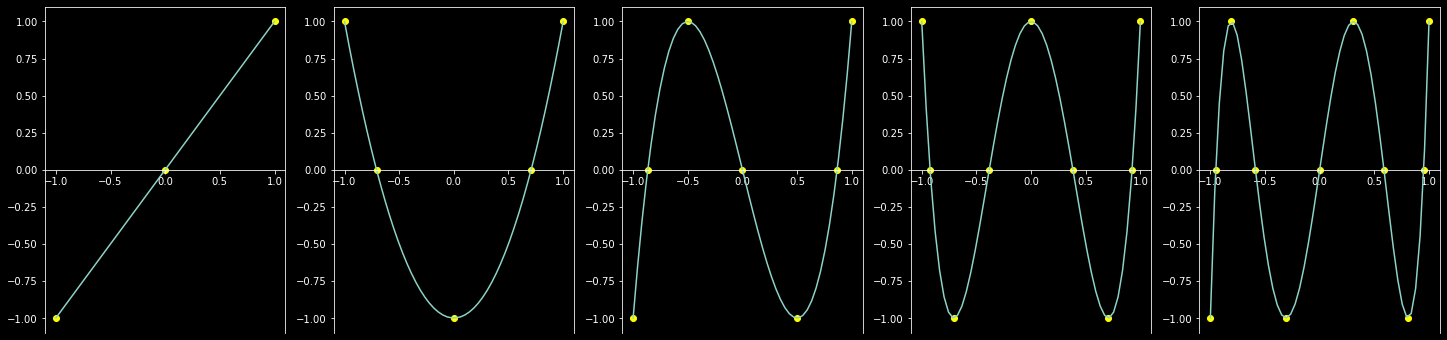

In [15]:
plt.style.use("dark_background")
# gráficas de algunos polinomios de Chebyshev
def graficaPolinomiosChebyshev(n):
    fig, ax = plt.subplots(1, n, figsize=(5*n,6))
    dom = np.linspace(-1,1)
    for k in range(1, n+1):
        P_k = polyChebyshevFunc(k)
        ax[k-1].plot(dom, P_k(dom))
        ax[k-1].spines['bottom'].set_position("zero")
        ceros = zerosChebyshev(k)
        ax[k-1].scatter(ceros, np.zeros_like(ceros), c='yellow')
        extremos = extremosChebyshev(-1, 1, k)
        ax[k-1].scatter(extremos, P_k(extremos), c='yellow')
    plt.show()

graficaPolinomiosChebyshev(5)

**Aplicación a la fórmula del error de interpolación**

Si se toman los $n+1$ puntos de interpolación $x _{0}, x _{1}, \dots , x _{ n}   $, como los ceros del polinomio de Chebyshev $T _{n+1} $ entonces se tendrá que $$f(x) - P(x) = \displaystyle \frac{T _{ n+1}(x) }{2 ^{ n} (n+1)!} f ^{(n+1)} (c) $$

Dado que si $x \in [-1,1]$, entonces $|T _{n+1}(x)|\leq 1 $, entonces $$|f(x) - P(x)| = \displaystyle \frac{|f ^{(n+1)} (c) |}{2 ^{ n} (n+1)!} \leq  \frac{ \displaystyle 
\max _{a\leq x \leq b} |f ^{(n+1)} (x) |}{2 ^{ n} (n+1)!} $$

Si la interpolación se efectúa en el intervalo $[a, b]$ con los puntos $$y _{k } = \displaystyle \frac{b-a}{2} x _{k } + \frac{b+a}{2}  $$ como puntos de interpolación, entonces  el producto $A(x) = (x-y _{0}) (x - y _{ 1} ) \cdots (x - y _{n} ) $ satisface la desigualdad $|A(x)| \leq \frac{(b-a) ^{n+1} }{2 ^{2n + 1} } $ para toda $x \in [a,b]$ y por tanto la estimación correspondiente para el error será:
$$|f(x) - P(x)| \leq \frac{(b-a) ^{n+1} }{2 ^{2n+1} (n+1)! } |f ^{(n+1)}(c) | \leq \frac{(b-a) ^{n+1}\displaystyle \max _{a\leq x \leq b} |f ^{(n+1)}(x) |   }{2 ^{2n+1} (n+1)! } $$

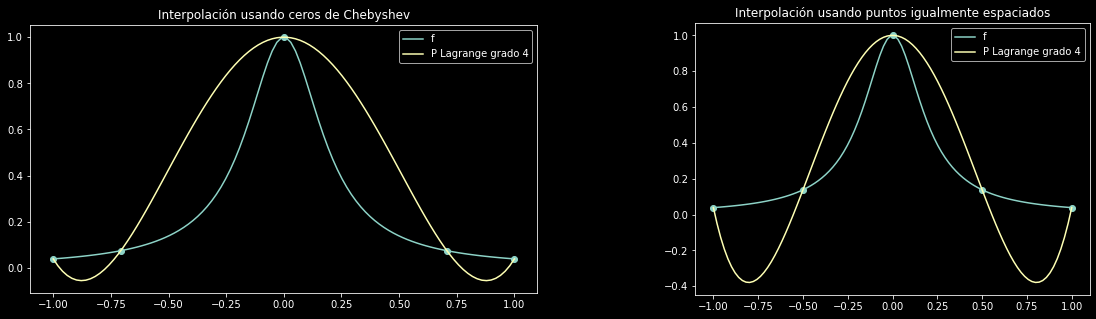

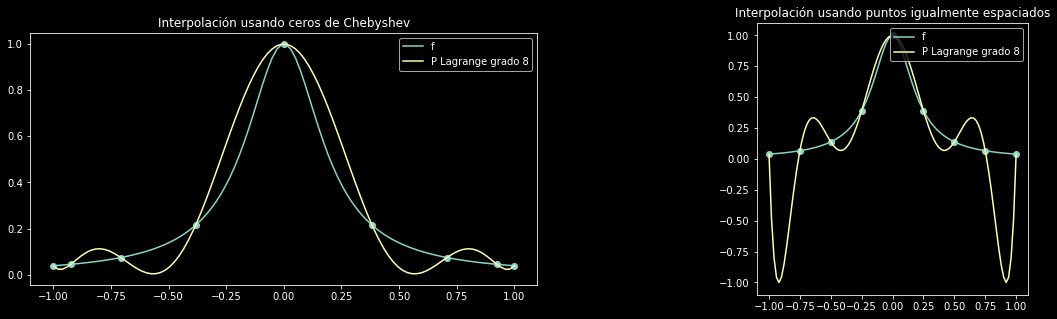

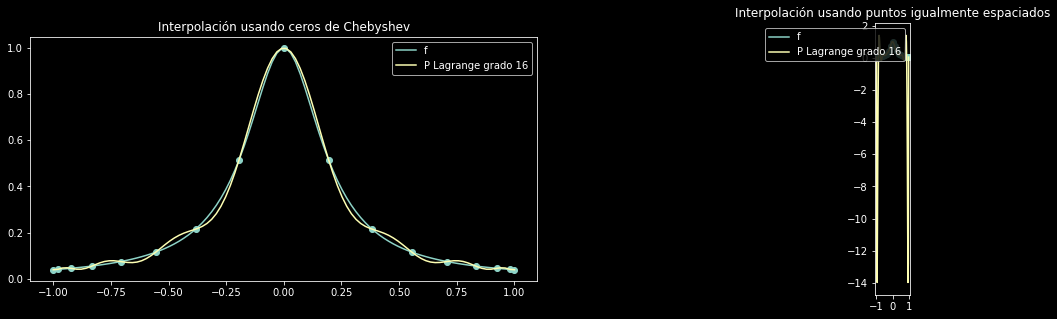

In [23]:
# comparación gráfica entre interpolaLagrange e interpolación usando ceros de Chebyshev
def compara(n):
    X = extremosChebyshev(-1, 1, n)
    Xreg = np.linspace(-1, 1, n+1)
    f = sy.lambdify(x, 1/(1+25 * x**2), "numpy")
    Y, Yreg = f(X), f(Xreg)
    dom = np.linspace(-1, 1, 100)
    P = interpolaLagrangeFunc(X, Y)
    Preg = interpolaLagrangeFunc(Xreg, Yreg)

    fig, ax = plt.subplots(1,2, figsize=(20,5))
    plt.subplot(121)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.plot(dom, f(dom), label="f")
    plt.plot(dom, P(dom), label=f"P Lagrange grado {n}")
    plt.scatter(X, f(X))
    plt.legend(loc="upper right")
    plt.title("Interpolación usando ceros de Chebyshev")
    plt.subplot(122)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.plot(dom, f(dom), label="f")
    plt.plot(dom, Preg(dom), label=f"P Lagrange grado {n}")
    plt.scatter(Xreg, f(Xreg))
    plt.legend(loc="upper right")
    plt.title("Interpolación usando puntos igualmente espaciados")
    plt.show()
for n in [2**k for k in range(2, 5)]:
    compara(n)

In [17]:
# estimación de error cometido en la interpolación
import sympy as sy
import numpy as np

def cantidadDePuntosParaControlarError(f_expr, a, b, tol):
    """
    ENTRADAS: f_expr es expresión simbólica de sympy. a y b son floats extremos del intervalo.
                tol es un float no negativo con el que se pretende acotar el error al interpolar
    SALIDAS: n es un int. Cantidad de puntos necesarios en la interpolación para controlar el error        
    """
    dom = np.linspace(a, b)
    x = sy.symbols('x')
    for n in range(2, 100):
        Dfn_expr = f_expr.diff(x, n)
        Dfn = sy.lambdify(x, Dfn_expr, "numpy")
        Df_max = np.max(np.abs(Dfn(dom))) 
        coef = (b-a)**(n+1) / ((2**(2*n+1)) * np.math.factorial(n+1))
        cota_sup = coef * Df_max
        if cota_sup < tol:
            break
    return n

f_expr = sy.exp(-x**2) * sy.cos(10 * x)
a, b = -1, 1
tol = 1e-7
print(cantidadDePuntosParaControlarError(f_expr, a, b, tol))

25


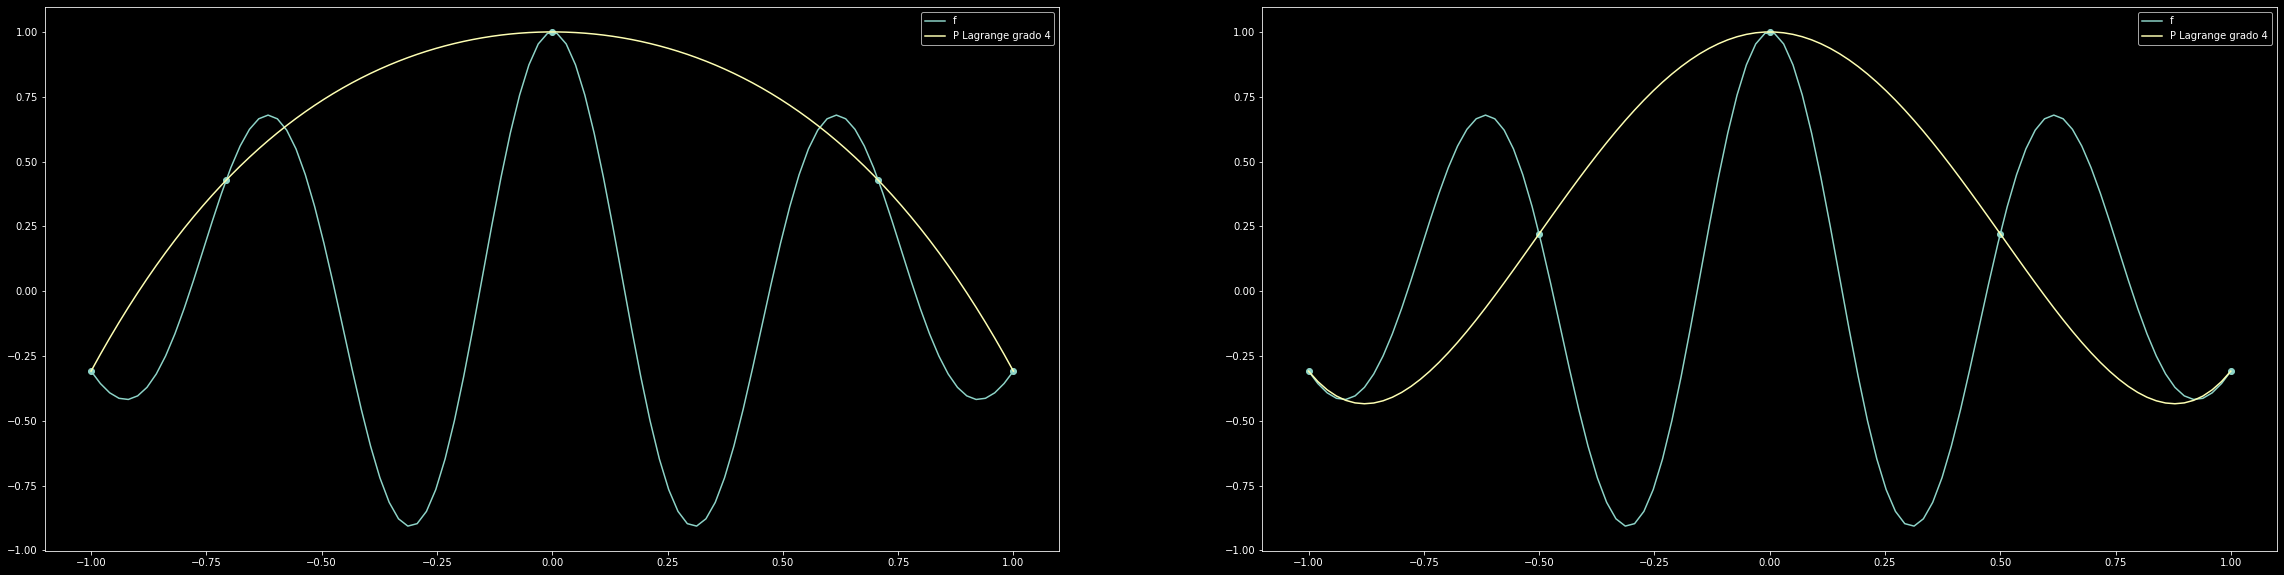

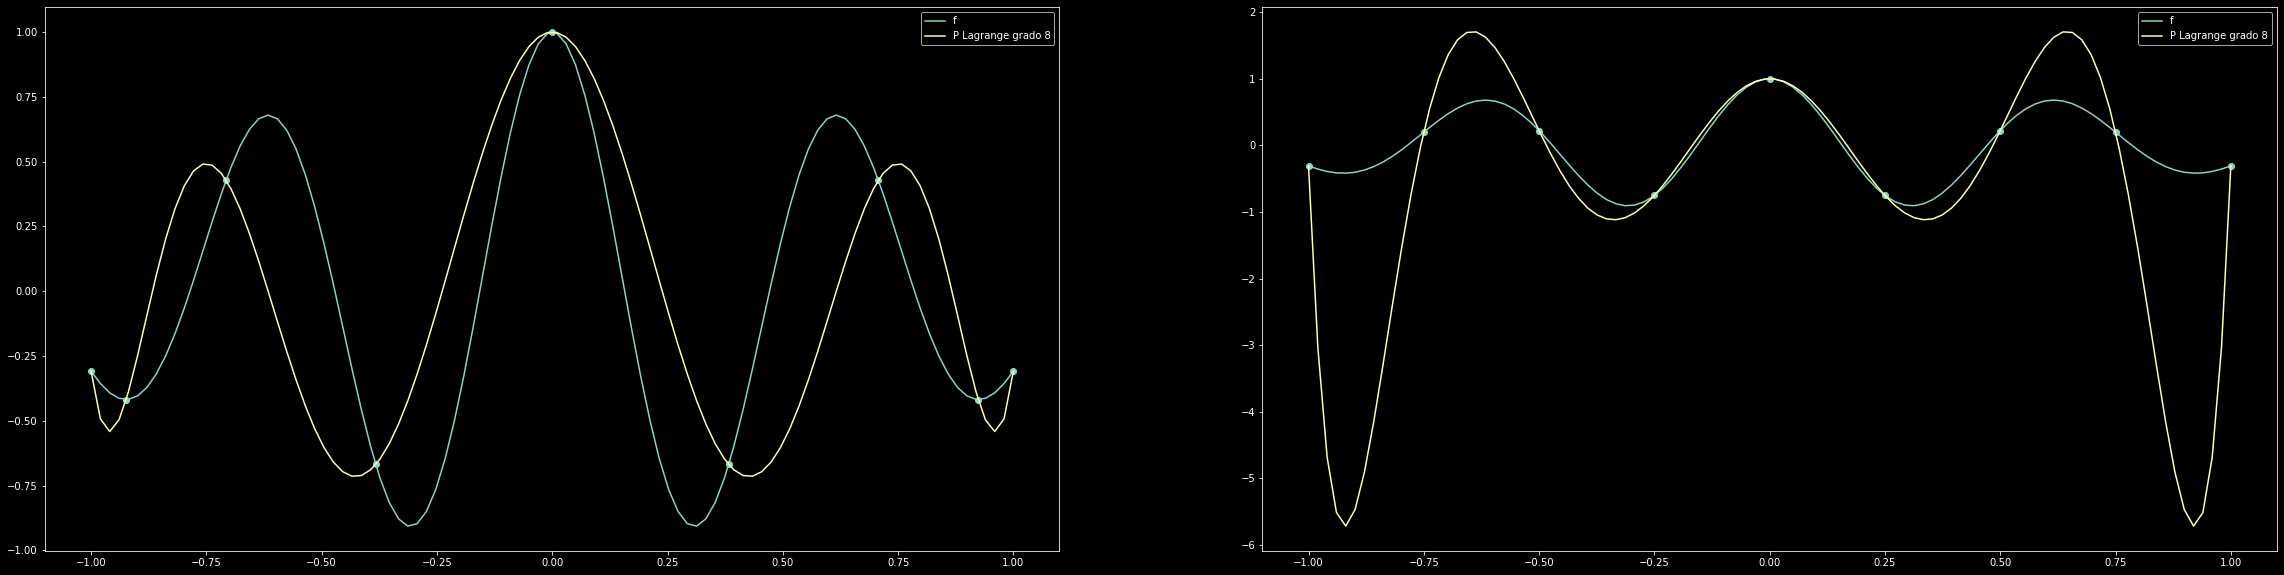

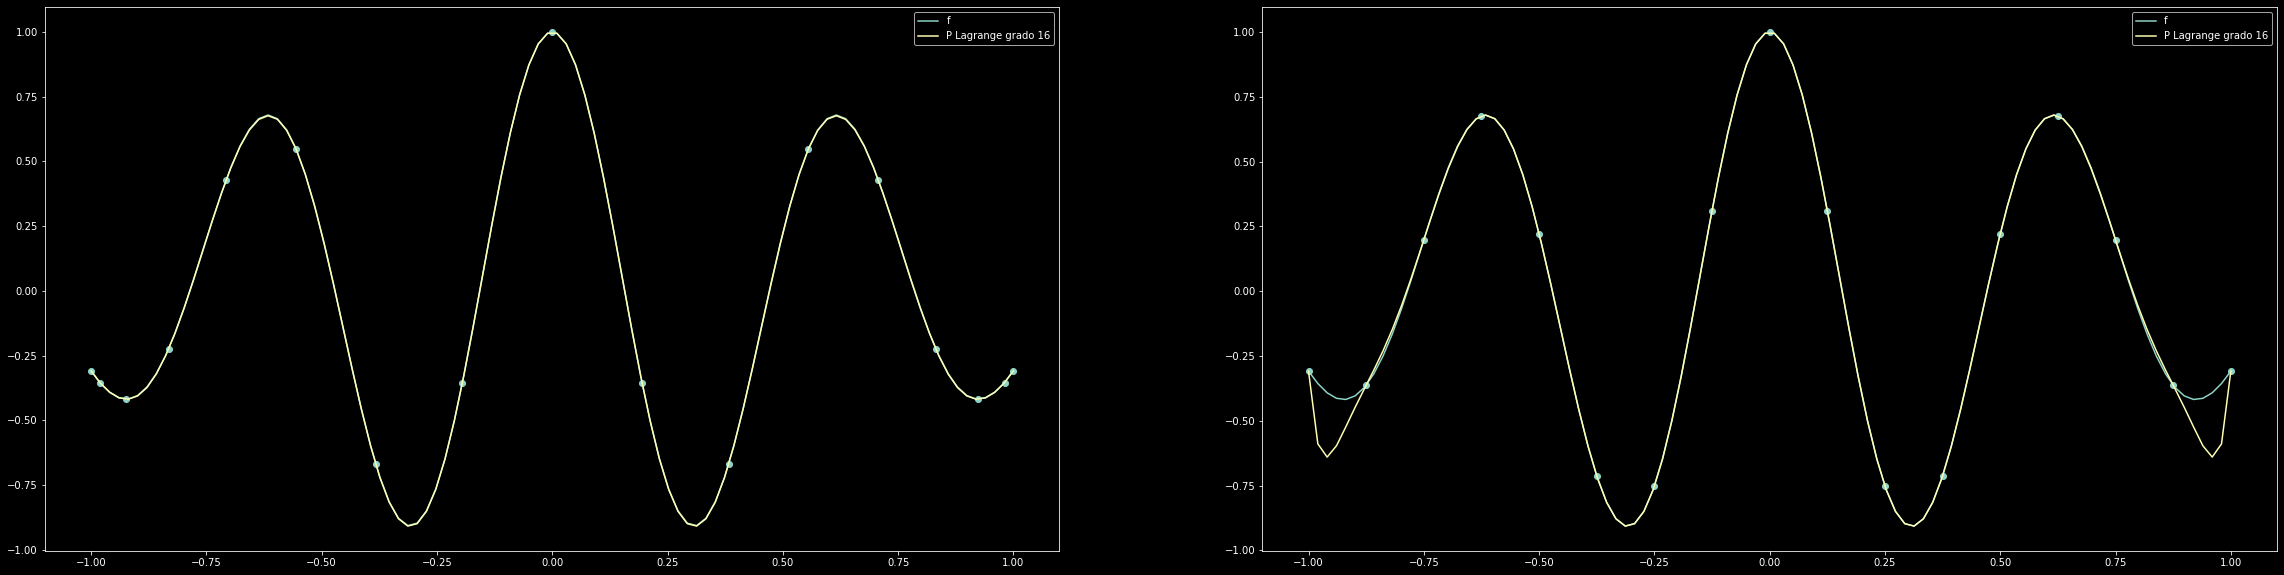

In [22]:
# comparación gráfica entre interpolaLagrange e interpolación usando ceros de Chebyshev
def compara(n):
    X = extremosChebyshev(-1, 1, n)
    Xreg = np.linspace(-1, 1, n+1)
    f = sy.lambdify(x, sy.cos(10*x) * sy.exp(-x**2), "numpy")
    Y, Yreg = f(X), f(Xreg)
    dom = np.linspace(-1, 1, 100)
    P = interpolaLagrangeFunc(X, Y)
    Preg = interpolaLagrangeFunc(Xreg, Yreg)

    fig, ax = plt.subplots(1,2, figsize=(40,10))
    plt.subplot(121)
    plt.plot(dom, f(dom), label="f")
    plt.plot(dom, P(dom), label=f"P Lagrange grado {n}")
    plt.scatter(X, f(X))
    plt.legend(loc="upper right")
    plt.subplot(122)
    plt.plot(dom, f(dom), label="f")
    plt.plot(dom, Preg(dom), label=f"P Lagrange grado {n}")
    plt.scatter(Xreg, f(Xreg))
    plt.legend(loc="upper right")
    plt.show()
for n in [2**k for k in range(2, 5)]:
    compara(n)